## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

# Code from the prior HW to import the **congressional voting records**

In [1]:
# block of code that is normally copy pasted. 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# block of code that helps format exploratory charts without much need to hardcode values later on. 
from matplotlib import style
style.use('fivethirtyeight')

In [3]:
# need to wget the dataset. 

! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data --no-check-certificate

--2020-04-13 00:52:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-04-13 00:52:22 (636 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [5]:
# shaping the above dataframe. 
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

shaped_cong_df = pd.read_csv('house-votes-84.data', 
                     header=None,
                     names=column_headers,
                     na_values='?')

shaped_cong_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [6]:
# recoding the dataset. 
shaped_cong_df_recode = shaped_cong_df.replace({'y':1, 'n':0})
shaped_cong_df_recode.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
#isolating the voting info. 
demo_vote_info = shaped_cong_df_recode[shaped_cong_df_recode['party']=='democrat']
rep_vote_info = shaped_cong_df_recode[shaped_cong_df_recode['party']=='republican']

# start of the first part assignment: 

1. Generate and numerically represent a confidence interval


**Null Hypothesis:** The is no significant difference in voting pattterns between democrats and republicans on the water bill project.  

**Alternative Hypothesis:** The is a significant difference in voting pattterns between democrats and republicans on the water bill project.  

In [42]:
ttest_1samp(demo_vote_info['water-project'], .5, nan_policy='omit')
# based on the p-value of this statistic, ie 0.95; we can conclude. 
# the value falls out of the 95% confidence interval required to reject the null hypothesis in favor of the alternate. Therefore we fail to reject the null value. 


Ttest_1sampResult(statistic=-1.0783390589468698, pvalue=0.2829926703097308)

# start of the second part assignment: 

2. Graphically (with a plot) represent the confidence interval

In [45]:
# descrive stats
demo_vote_info['water-project'].describe()


count    124.000000
mean       0.451613
std        0.499672
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: water-project, dtype: float64

In [0]:
# getting the dof 
# df = N-1
# Where N is the number of values in the data set (sample size). Take a look at the sample computation.

# the count is 124=n; n-1;
df = len(demo_vote_info['water-project']) - 1 
 


In [0]:
demo_vote_info = demo_vote_info.dropna()

In [55]:
conf_int=stats.t.interval(0.95,
                 demo_vote_info['water-project'].shape[0],
                 loc = demo_vote_info['water-project'].mean(),
                 scale = (np.std(demo_vote_info['water-project'], ddof = 1)))
conf_int

# ddof is 1 is because of np.std; 

(-0.5373780830074009, 1.4406038894590139)

In [0]:
# based on the above data we can see a massive variability in the dataset, as the upper and lower values are +1 the range of the data. 


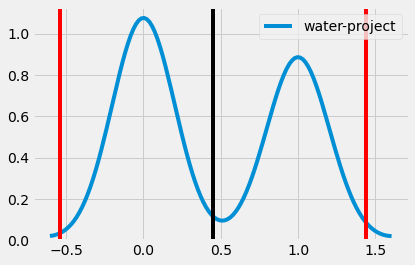

In [54]:
sns.kdeplot(demo_vote_info['water-project'])
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=conf_int[1], color='red',)
plt.axvline(x=demo_vote_info['water-project'].mean(), color='k');

# start of the third part of the assignment:

3. Interpret the confidence interval - what does it tell you about the data and its distribution?

--------------------------------------------


**Answer:** 


Based on the above dataset we can visualize something. 
1. the data is bimodal (0/1) as its maxima. 
2. the peaks of those maxima (amplitude) are vaguely the same, which indicates on average the chance its 0/1 is 50%. We can see this output based on the statistics testing in part 1. with the fact we failed to reject the null value. 
3. the mean is ~0.5
4. there is no proper confidence to be interpretted. based on the red lines. the values are outside the parameters of 0-1.  

# start of the fourth part of the assignment: 

***Chi-squared tests:***
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

### generation of the dataset

copy pasted values from [this](https://github.com/rawalk/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb). 

**recreating the titanic dataset.** 

In [33]:
# reading in the csv from the professors github that has the "titanic dataset". 

link = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
t_df = pd.read_csv(link)

# this is superior version of .head() or .tail(); faster for jank analysis. 
t_df.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked
591,0,1,male,70.0,71.0000,Southampton
677,0,3,male,74.0,7.7750,Southampton
607,1,3,male,20.0,7.2292,Cherbourg
316,0,3,male,22.0,7.7958,Southampton
218,1,2,female,41.0,19.5000,Southampton
430,1,2,male,32.0,26.0000,Southampton
374,0,3,male,38.0,8.6625,Southampton
697,1,2,female,28.0,24.0000,Cherbourg
43,1,2,female,5.0,27.7500,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [35]:
# Pclass is a categorical variable.
# the dictionary for that is : 1 = First Class, 2 = Second Class, 3 = Third Class. 

t_df['cabin_class'] = t_df['Pclass'].map({1:'First Class', 2:'Second Class', 3:'Third Class'})
t_df[['Pclass', 'cabin_class']].sample(6)

,Pclass,cabin_class
583,2,Second Class
159,3,Third Class
362,1,First Class
602,3,Third Class
237,3,Third Class
294,1,First Class


### starting the code beneath. 

In [36]:
# visualizing the categoerical variables available to work with in this dataset. 
t_df.describe(exclude='number')

,Sex,Embarked,cabin_class
count,712,712,712
unique,2,3,3
top,male,Southampton,Third Class
freq,453,554,355


In [39]:
# creation of contigency table
contingency_table = pd.crosstab(t_df['Sex'], t_df['cabin_class'], margins=True)
contingency_table


cabin_class,First Class,Second Class,Third Class,All
Sex,,,,
female,83,74,102,259
male,101,99,253,453
All,184,173,355,712


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)